In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import seaborn as sns

# Charger le dataset MNIST
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Créer un modèle simple
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler et entraîner le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)


# Choisir une image de test
test_img = test_images[0].reshape(1, 28, 28)


%matplotlib inline
import matplotlib.pyplot as plt

# Sélectionner une image de test et la redimensionner pour l'affichage
selected_test_image = test_images[0]


ModuleNotFoundError: No module named 'seaborn'

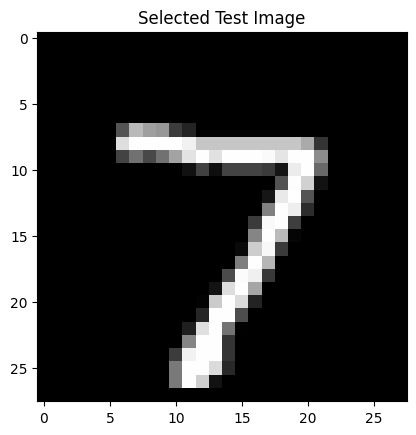

1/1 [==============================] - 0s 19ms/step
Predicted class: 7
1/1 [==============================] - 0s 20ms/step
Activations de la dernière couche (softmax outputs): [[2.6512151e-07 3.3670725e-10 1.7950083e-06 4.3885558e-04 4.0268458e-10
  6.3625216e-06 3.7767942e-14 9.9947208e-01 4.3899076e-06 7.6356642e-05]]


In [23]:

# Afficher l'image
plt.imshow(selected_test_image, cmap='gray')
plt.title('Selected Test Image')
plt.show()
# Redimensionner l'image pour qu'elle ait une forme compatible avec le modèle
test_img_reshaped = selected_test_image.reshape(1, 28, 28)
# Utiliser le modèle pour prédire la classe de l'image
prediction = model.predict(test_img_reshaped)

# Obtenir l'indice de la valeur maximale dans les prédictions
predicted_class = np.argmax(prediction, axis=1)

# Afficher la classe prédite
print("Predicted class:", predicted_class[0])


In [ ]:

# Faire une prédiction
prediction = model.predict(test_img_reshaped)

# Utiliser seaborn pour créer une heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(prediction, annot=True, cmap='viridis', cbar=True)
plt.title("Heatmap des Probabilités de la Dernière Couche")
plt.ylabel("Probabilités")
plt.xlabel("Classes")
plt.xticks(np.arange(10), np.arange(10))  # Pour afficher les labels de classes de 0 à 9
plt.show()